**PROJECT NAME:** Credit Card Customer Data

**Project Description:** A Customer Credit Card Information Dataset which can be used for Identifying Loyal Customers, Customer Segmentation, Targeted Marketing and other such use cases in the Marketing Industry.

**Dataset DESCRIPTION**: Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

1. Avg_Credit_Limit: Average Credit Card Limit For The Customer

2. Total_Credit_Cards: Total Credit Cards Owned by the Customer

3. Total_visits_bank: Total Number of Bank Visits by the Customer

4. Total_visits_online: Total Visits Online by the Bank Customer

5. Total_calls_made: Total Calls Made by the Customer to the Bank

**About Dataset:** 660 rows × 7 columns

**Project Overview:**


This Project is divided into 17 major steps which are as follows:

   1.Data description
   
   2.Importing Libraries & setting up environment
   
   3.Loading Dataset
   
   4.Data Analysis
   
   5.Data Cleaning & Preprocessing
   
   6.Exploratory Data Analysis
   
   7.Correlation
   
   9.Separating Feature Selection
   
 10.Scaling Data

 11.Splitting Train,Test & Validation Data

 12.Model Building (K-means )

 13.Elbow method

 14.Silhoutte Score

 15.K_means Plot

 16.Grouping Cluster Lables

 17.Conclusion


**Dataset Link:** https://www.kaggle.com/datasets/aryashah2k/credit-card-customer-data

**Libraries**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

**Data load**

In [ ]:
path= "/content/drive/MyDrive/credit card dataset/Credit Card Customer Data.csv"
df = pd.read_csv(path)

In [ ]:
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [ ]:
df.shape

(660, 7)

**Data Analysis**

In [ ]:
#checking first five rows by calling df.head()
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
#checking last five rows by calling df.tail()
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


Here we get information about our data set and we can see that we have 7 integer values & we can see that we have 660 variables

In [ ]:
#check null value
df.isnull().values.any()

False

As we can see here, the output is False, which means our dataset has no missing values.

In [ ]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

Total number of rows with missing values is 0.

In [ ]:
#check statistics
df.describe().style.background_gradient(cmap='Oranges')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000



The table provides descriptive statistics for a dataset with columns: Sl_No (Serial Number), Customer Key, Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank, Total_visits_online, and Total_calls_made. The statistics include count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each column, offering insights into the distribution and central tendencies of the data.

**Data Cleaning**

In [ ]:
#Removing unwanted columns
df = df.drop(['Sl_No', 'Customer Key'], axis = 1)
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [ ]:
df.shape

(660, 5)

In [ ]:
#check duplicate values
df_dup = df.duplicated().any()
df_dup

True

As we can see here, the output is True, which means our dataset has some duplicate values. So let’s drop them.

In [ ]:
#drop duplicate values
df = df.drop_duplicates()

In [ ]:
#check for the duplicated values once again
df_dup = df.duplicated().any()
df_dup

False

As we can see here, the output is False, which means our dataset becomes free from duplicated values.

**Exploratory Data Analysis(EDA)**

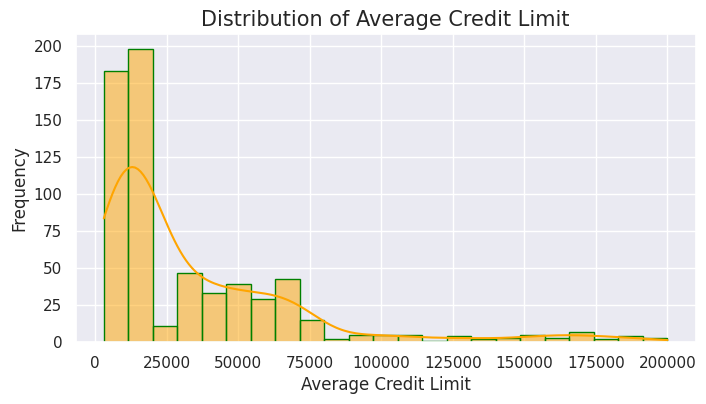

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.histplot(data=df, x='Avg_Credit_Limit', kde=True, ax=ax, color='orange', edgecolor='green', linewidth=1)

ax.set_title('Distribution of Average Credit Limit', fontsize=15)
ax.set_xlabel('Average Credit Limit', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(True)

plt.show()

In [ ]:
df.groupby(['Total_Credit_Cards'])['Avg_Credit_Limit'].count()

Total_Credit_Cards
1      58
2      63
3      53
4     147
5      74
6     113
7     100
8      11
9      11
10     19
Name: Avg_Credit_Limit, dtype: int64

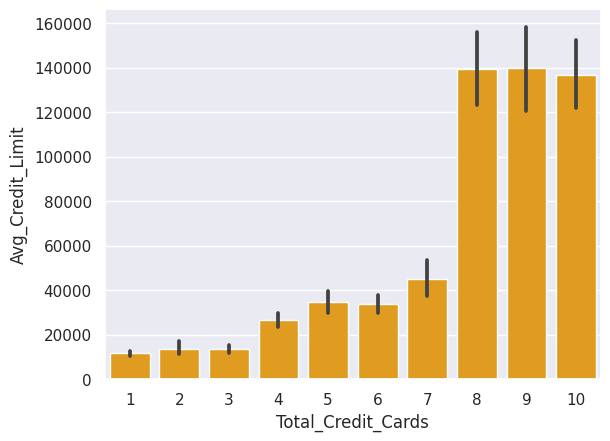

<Figure size 300x200 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Assuming df is your DataFrame
sns.barplot(x=df["Total_Credit_Cards"], y=df["Avg_Credit_Limit"], color="orange")

# Set the figure size
plt.figure(figsize=(3, 2))  # Adjust the values (width, height) as needed

plt.show()


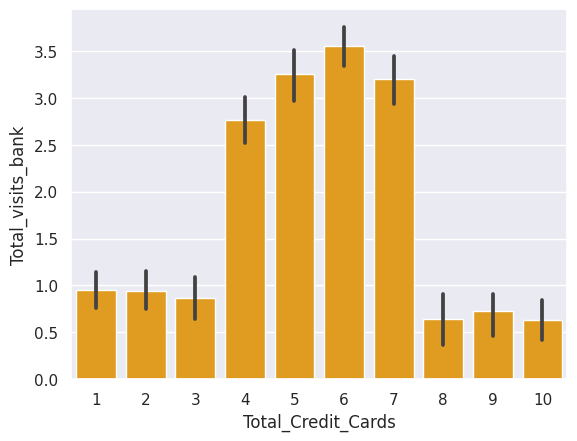

<Figure size 300x200 with 0 Axes>

In [ ]:
#Total credit card vs avarage credit limits
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.barplot(x=df["Total_Credit_Cards"], y=df["Total_visits_bank"], color="orange")

# Set the figure size
plt.figure(figsize=(3, 2))  # Adjust the values (width, height) as needed

plt.show()

**Correlation**

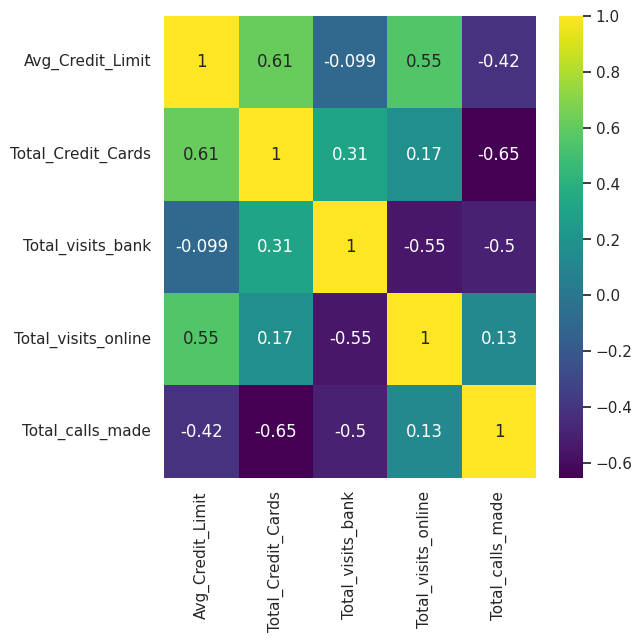

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()






1.We have already seen that none of the fields have null values.

2.A heatmap Plot shows there is high positive correlation between Avarage Credit Limit and Total Credit Cards.

3.The heat map also shows that total bank visits have negation relationship with the total visits made online and total calls made.

4.Total calls made also have a negative correlation with the Total number of credit cards.



**Here, we will perform clustering using K-Means:**

Here, we will use K-Means for customer segmentation based on:

 Average Credit Limit, Total Credit cards, and Total bank visits.




**Separating Feature Selection**



In [ ]:
x = df.iloc[: , [0,1,2]]
print(f"x Shape {x.shape}")
x.head()

x Shape (649, 3)


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank
0,100000,2,1
1,50000,3,0
2,50000,7,1
3,30000,5,1
4,100000,6,0




**Scaling Data / Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.72349946, -1.24708705, -0.86060646],
       [ 0.40020878, -0.78670054, -1.47640975],
       [ 0.40020878,  1.05484553, -0.86060646],
       ...,
       [ 2.91446107,  1.51523205, -0.86060646],
       [ 3.62903804,  2.43600508, -0.86060646],
       [ 3.49670897,  1.97561857, -1.47640975]])



**Split into Training, Validation and Test datasets**



We will reserve about 25% of this data as test dataset. We will use 25% as Validation dataset, this will be helpful for tuning the number of clusetrs needed and rest 50% of the data will be used to train the model.We are reserving 25% of the dataset for test and validation each because this is a small dataset of 660 rows. For smaller datasets, it is recommended to have larger validation and test sets to ensure the model generalizes well.


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val = train_test_split(x,test_size = 0.50,random_state=42)
x_val, x_test = train_test_split(x_val, test_size = 0.50, random_state=42)

In [ ]:
print('shape of training dataset is {}'.format(x_train.shape[0]))
print('shape of validation dataset is {}'.format(x_val.shape[0]))
print('shape of test dataset is {}'.format(x_test.shape[0]))

shape of training dataset is 324
shape of validation dataset is 162
shape of test dataset is 163


**Model**

**KMEANS**: k-Means is an unsupervised machine learning algorithm for clustering data points into 'k' distinct groups based on similarity, minimizing intra-cluster variance.

In [ ]:
from sklearn.cluster import KMeans
optimal_clusters = 3

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(x)

KMeans(n_clusters=3, n_init=10, random_state=0)

**n_clusters**: Number of clusters to form.

**init='k-means++':** Method for initializing centroids.

**max_iter=**300: Maximum number of iterations for convergence.

**n_init=10:** Number of times the algorithm will be run with different centroid seeds.

**random_state=0:** Seed for random number generation, ensuring reproducibility.


**Cluster Labels**

In [ ]:
# Fit the model and get cluster labels
labels = kmeans.fit_predict(x)

# Add the 'Cluster' column to your DataFrame
df['Cluster'] = labels


# Display the counts of each cluster
print(df['Cluster'].value_counts())


1    366
2    233
0     50
Name: Cluster, dtype: int64



The data has been clustered into five groups. Cluster 1 has the highest count with 366 data points, followed by Clusters 0 & 2.

**Centroid_Positions**

In [ ]:
centroid_positions = kmeans.cluster_centers_

# Print the centroids
print("\ncentroid_positions:")
print(pd.DataFrame(centroid_positions , columns=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank']))




centroid_positions:
   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank
0          2.809656            1.855918          -1.106928
1         -0.012325            0.396971           0.702457
2         -0.583570           -1.021834          -0.865892



The provided "centroid_positions" appear to represent the average values for three features: Avg_Credit_Limit, Total_Credit_Cards, and Total_visits_bank, across different clusters or groups. Each row corresponds to a cluster's centroid position in a multi-dimensional space, suggesting distinct patterns or segments within the data.

**Euclidean distances**

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances_argmin_min

centroid_positions = kmeans.cluster_centers_

euclidean_values = pairwise_distances_argmin_min(df[['Avg_Credit_Limit',	'Total_Credit_Cards', 'Total_visits_bank']], centroid_positions )[1]

# Add Euclidean values to DataFrame
df['Euclidean_Value'] = euclidean_values
df['Euclidean_Value']
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster,Euclidean_Value
0,100000,2,1,1,0,2,99997.190366
1,50000,3,0,10,9,2,49997.190369
2,50000,7,1,3,4,1,49997.190653
3,30000,5,1,1,4,2,29997.190582
4,100000,6,0,12,3,0,99997.190436



The 'Euclidean_Value' column represents the Euclidean distance between each data point and its assigned cluster's centroid in the k-means clustering. It provides a measure of how closely each data point aligns with its cluster center.

**Inertia**: Sum of squared distances from points to their cluster centroids.

In [ ]:
kmeans.inertia_

583.1414121596946

**Predict**

In [ ]:
y_pred = kmeans.fit_predict(x)

print(y_pred)

[2 2 1 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

**Elbow Method**: The elbow method uses a plot of inertia (sum of squared distances to cluster centroids) against the number of clusters to identify an optimal cluster count, revealing an "elbow" point where further increases offer diminishing returns in model improvement.

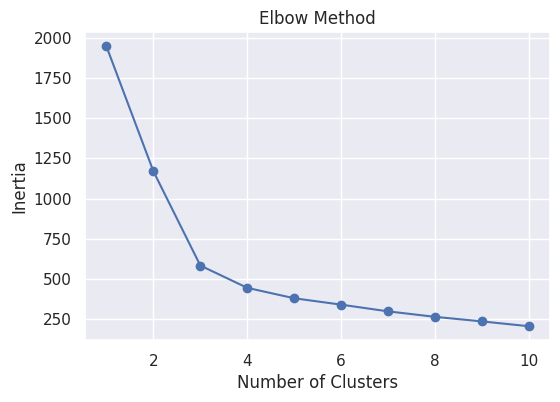

In [ ]:
# Elbow Method: Find the optimal number of clusters
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x)
    inertia_values.append(kmeans.inertia_)

# Set a smaller figure size using the figsize parameter
plt.figure(figsize=(6 , 4))

# Plot the Elbow Method
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()




**Observations**

1. From the plot above, we can see that the values for inertia decrease very rapidly up till the point where value for number of clusters reach 3 and it decreases slowly. This point in the graph is known as the Elbow and this indicates the the value of 3 is optimun value to be used for number of clusters-any lower value for number of clusters would be dramatic while a higher value is not going to contribute much.

2. So going forward we will be using the value of 3 as number of clusters.

3. This method is good to know what could be the appropriate ammount of clusters to be chosen for the KMeans model but a more precise approach would be to calculate something called a Silhoutte Score.




**Silhoutte Score:** Silhouette score measures how well-defined clusters are in a model. It ranges from -1 to 1. Higher scores indicate better-defined clusters. To calculate, use silhouette_score from sklearn.metrics, passing training data and generated labels. Plot scores for varying cluster numbers, akin to the elbow method graph.



In [ ]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(x, labels)

0.48942375545411004

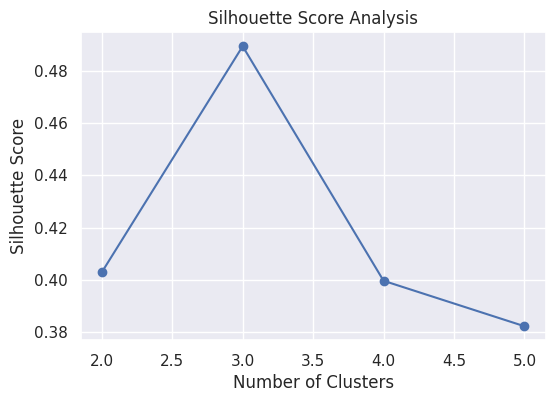

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 6):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(x, labels)
    silhouette_scores.append(silhouette_avg)

 # Plot the Silhouette Score with minimized figsize
plt.figure(figsize=(6, 4))

# Plot the Silhouette Score
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


**Observations**

**1.**As can be seen from this visualization, this gives a much more crisp picture of how many number of clusters should be there. This affirms that the value of 3 is the optimun value to be used.

**2.**Lets plot every instances silhouette's coeff with a silhouette diagram.


**KMeans Plot**

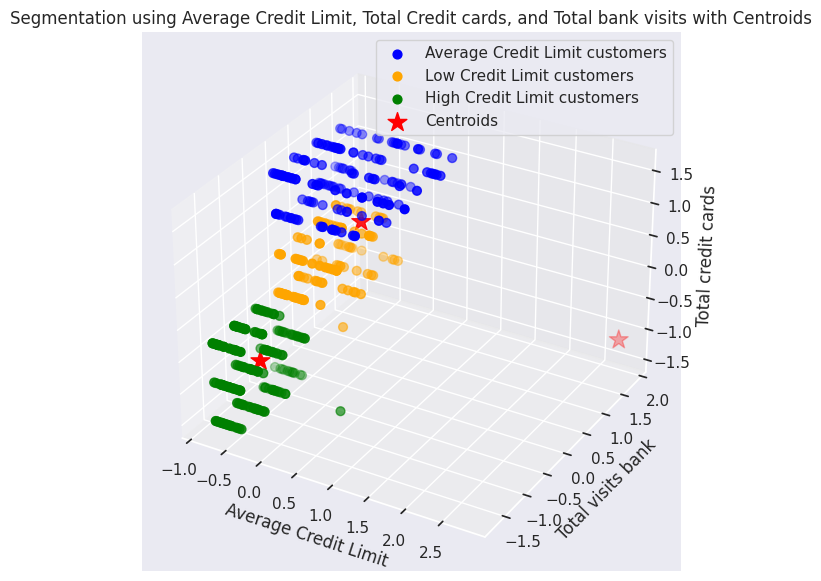

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming kmeans is your KMeans model and x is your data
centroids = kmeans.cluster_centers_
pred = kmeans.labels_

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points
ax.scatter(x[pred == 0, 0], x[pred == 0, 1], x[pred == 0, 2], s=40, color='blue', label="Average Credit Limit customers")
ax.scatter(x[pred == 1, 0], x[pred == 1, 1], x[pred == 1, 2], s=40, color='orange', label="Low Credit Limit customers")
ax.scatter(x[pred == 2, 0], x[pred == 2, 1], x[pred == 2, 2], s=40, color='green', label="High Credit Limit customers")

# Scatter plot for centroids
ax.scatter(centroid_positions[:, 0], centroid_positions[:, 1], centroid_positions[:, 2], s=200, color='red', marker='*', label='Centroids')

plt.title('Segmentation using Average Credit Limit, Total Credit cards, and Total bank visits with Centroids')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total visits bank')
ax.set_zlabel('Total credit cards')
ax.legend()

plt.show()












From the above graph, we can see that there are 3 clusters.

**Low Credit Limit customers:** From the above graph, we can see that the customers present in this cluster have a low credit limit. The customers with few credit cards visit the bank lesser times than those who have more credit cards.

**Average Credit Limit customers:** From the above graph, we can see that the customers present in this cluster have an average credit limit. Most of the customers irrespective of the number of credit cards they have go to the bank more number of times.

**High Credit Limit customers:** From the above graph, we can see that the customers present in this cluster have a high credit limit. These customers have less than 5 credit cards and visit the bank atleast three times.

